### Jersey COVID 19 - Daily Confirmed Cases Plot Analysis

Import the libraries and obtain the latest "Coronavirus (COVID-19): Number of coronavirus (COVID-19) tests and confirmed cases in Jersey" data from the opendata.gov.je CKAN Data API into a Pandas DataFrame.

https://opendata.gov.je/dataset/coronavirus-covid-19-number-of-cases-in-jersey

https://opendata.gov.je/pages/open-government-licence-jersey-ogl-j-v1-0

In [1]:
import requests
import json
import pandas as pd

url = "https://opendata.gov.je/api/3/action/datastore_search?resource_id=85a4f87a-49f0-4ef0-b4db-731acdee94bb"
response = requests.get(url)
json_data = response.json()

data = json_data["result"]["records"]
data_table = pd.DataFrame.from_dict(data)

# Show the DataFrame head
data_table.head()

,_id,Date,Negativetests,Confirmedcases,Pendingresults,Deaths,Recovered,Totalsamplestested,Totalpeopletested,Totalresultsback,...,Averageagetestedpositive,Femalerecoveredpercentage,Malerecoveredpercentage,Averageagerecovered,Numberofhospitalbedsoccupied,Numberofhospitalbedsavailable,Hospitaloccupancyratepercentage,NumberofpatientswithCovid-19inhospital,DateTime,Note
0,1,2020-04-28T00:00:00,2289,284,62.0,20.0,185.0,2635.0,2423.0,2573.0,...,54.0,58.0,42.0,48.0,69.0,128.0,35.0,10.0,"string;#1:10 PM, Tuesday 28 April 2020",
1,2,2020-04-27T00:00:00,2249,283,13.0,19.0,181.0,2545.0,2341.0,2532.0,...,54.0,58.0,42.0,48.0,77.0,120.0,39.0,12.0,"string;#2:30 PM, Monday 27 April 2020",
2,3,2020-04-26T00:00:00,2191,281,30.0,19.0,170.0,2502.0,2306.0,2472.0,...,54.0,58.0,42.0,48.0,73.0,124.0,37.0,12.0,"string;#1:00 PM, Sunday 26 April 2020",
3,4,2020-04-25T00:00:00,2173,280,25.0,19.0,165.0,2478.0,2284.0,2453.0,...,54.0,58.0,42.0,48.0,72.0,125.0,37.0,13.0,"string;#3:00 PM, Saturday 25 April 2020",
4,5,2020-04-24T00:00:00,2126,278,13.0,19.0,165.0,2417.0,2229.0,2404.0,...,54.0,58.0,42.0,48.0,72.0,125.0,37.0,13.0,"string;#3:15 PM, Friday 24 April 2020",


Create a function to recycle a plot to show the number of cases over time.

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Explicitly registering the converters:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Adjust the default size of the plot
plt.rcParams['figure.dpi'] = 120

In [12]:
def daily_plot(x, y):    
    #Convert date strings to floats and then to date formats
    x = mdates.datestr2num(x)
    x = mdates.num2date(x)

    # Create table
    fig, ax = plt.subplots()
    ax.plot(x, y)

    # Adjust the x-axis date ticks
    loc_maj = mdates.WeekdayLocator(byweekday= 0, interval=1)
    loc_min = mdates.DayLocator()
    ax.xaxis.set_major_locator(loc_maj)
    ax.xaxis.set_minor_locator(loc_min)

    # Format the x-axis
    fig.autofmt_xdate()

    # Label the plot and the axis
    ax.set_xlabel('Date')
    ax.set_ylabel('Cases')
    ax.set_title('Jersey COVID-19 Confirmed Cases')
  
    # Render plot
    plt.show()

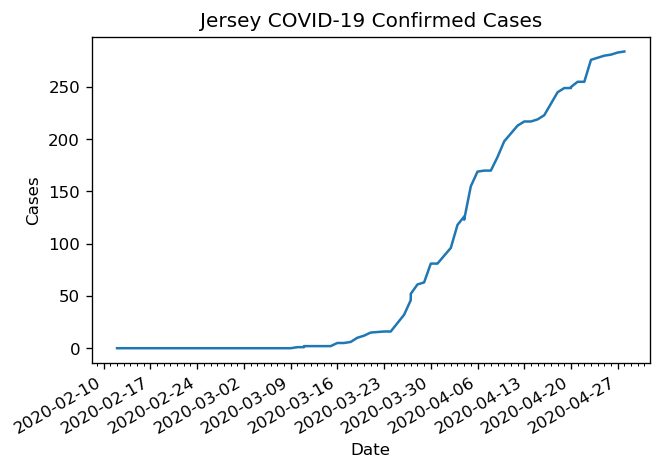

In [13]:
daily_plot(x = data_table["Date"], y = data_table["Confirmedcases"])

Create a column to show the number of new cases recorded each day and show the plot.

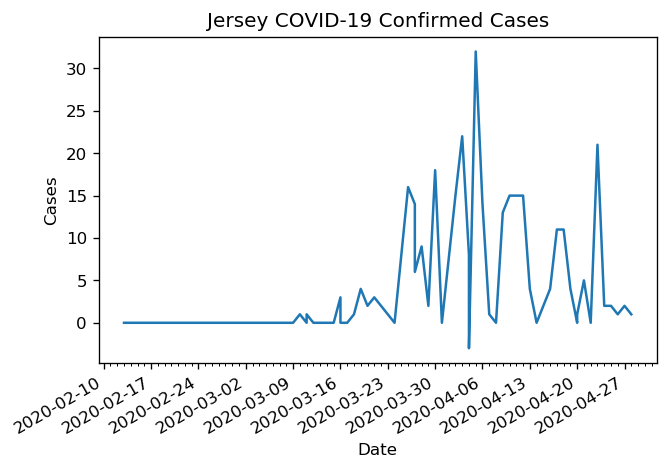

In [14]:
for i in range(0,data_table.shape[0]-1):
    data_table.loc[data_table.index[i],'Confirmedcases_delta'] = data_table.iloc[i,3] - data_table.iloc[i+1,3]

# View the plot
daily_plot(x = data_table["Date"], y = data_table["Confirmedcases_delta"])

Create another column to take the three day simple moving average of the new cases to smooth out the trend. Show the plot.

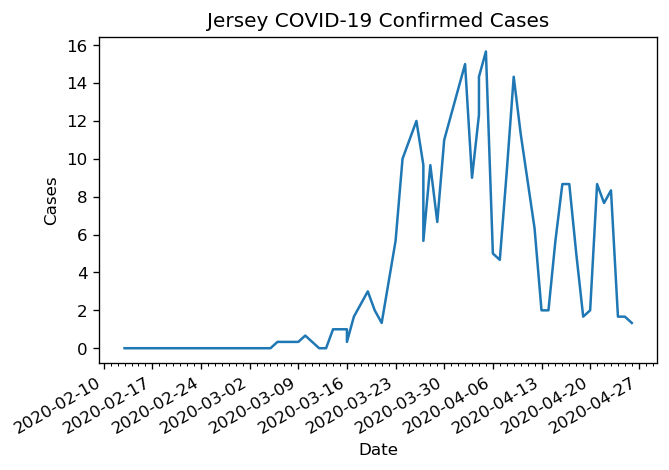

In [15]:
data_table['Confirmedcases_delta_SMA_3'] = data_table.iloc[:,22].rolling(window=3).mean()

# View the plot
daily_plot(x = data_table["Date"], y = data_table["Confirmedcases_delta_SMA_3"])

Create another column to take the five day simple moving average of the new cases to smooth out the trend. Show the plot.

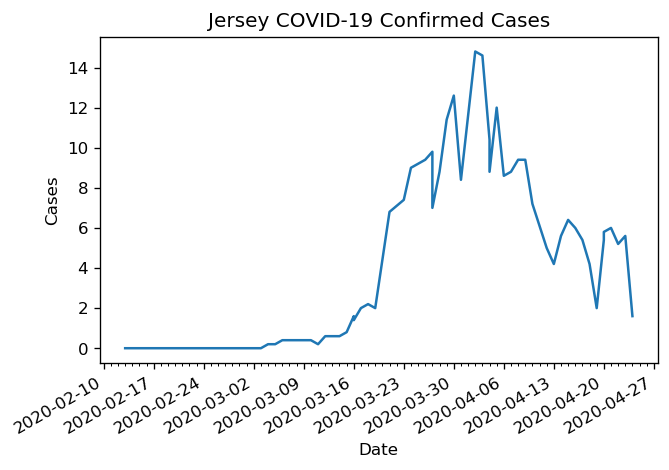

In [16]:
data_table['Confirmedcases_delta_SMA_5'] = data_table.iloc[:,22].rolling(window=5).mean()

# View the plot
daily_plot(x = data_table["Date"], y = data_table["Confirmedcases_delta_SMA_5"])